In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn .tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
co = pd.read_csv('/content/Company_Data.csv')

In [5]:
co

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
co.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
co.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
co['ShelveLoc']=co['ShelveLoc'].astype('category')
co['Urban']=co['Urban'].astype('category')
co['US']=co['US'].astype('category')

In [9]:
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [10]:
co['High'] = co.Sales.map(lambda x: 1 if x>8 else 0)

In [11]:
co.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [12]:
co['ShelveLoc']=co['ShelveLoc'].cat.codes
co['Urban']=co['Urban'].cat.codes
co['US']=co['US'].cat.codes
co.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0
399,9.71,134,37,0,27,120,1,49,16,1,1,1


In [13]:
x = co.drop(['Sales','High'],axis=1)
y = co.	High

In [14]:
print(x)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [15]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [16]:
co['High'].unique()

array([1, 0])

In [17]:
co.High.value_counts()

0    236
1    164
Name: High, dtype: int64

In [19]:
colnames = list(co.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'High']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [36]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [37]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.4642857142857143, 0.9, 'X[4] <= 92.5\nentropy = 0.969\nsamples = 320\nvalue = [193, 127]'),
 Text(0.23809523809523808, 0.7, 'X[5] <= 0.5\nentropy = 0.706\nsamples = 52\nvalue = [10, 42]'),
 Text(0.09523809523809523, 0.5, 'X[1] <= 57.0\nentropy = 0.989\nsamples = 16\nvalue = [7, 9]'),
 Text(0.047619047619047616, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.14285714285714285, 0.3, 'X[6] <= 79.5\nentropy = 0.684\nsamples = 11\nvalue = [2, 9]'),
 Text(0.09523809523809523, 0.1, 'entropy = 0.469\nsamples = 10\nvalue = [1, 9]'),
 Text(0.19047619047619047, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.38095238095238093, 0.5, 'X[3] <= 198.5\nentropy = 0.414\nsamples = 36\nvalue = [3, 33]'),
 Text(0.3333333333333333, 0.3, 'X[6] <= 56.5\nentropy = 0.811\nsamples = 12\nvalue = [3, 9]'),
 Text(0.2857142857142857, 0.1, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.38095238095238093, 0.1, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4285714285

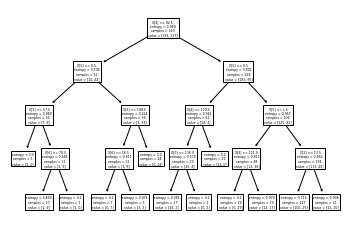

In [38]:
tree.plot_tree(model)

In [33]:
import seaborn as sns

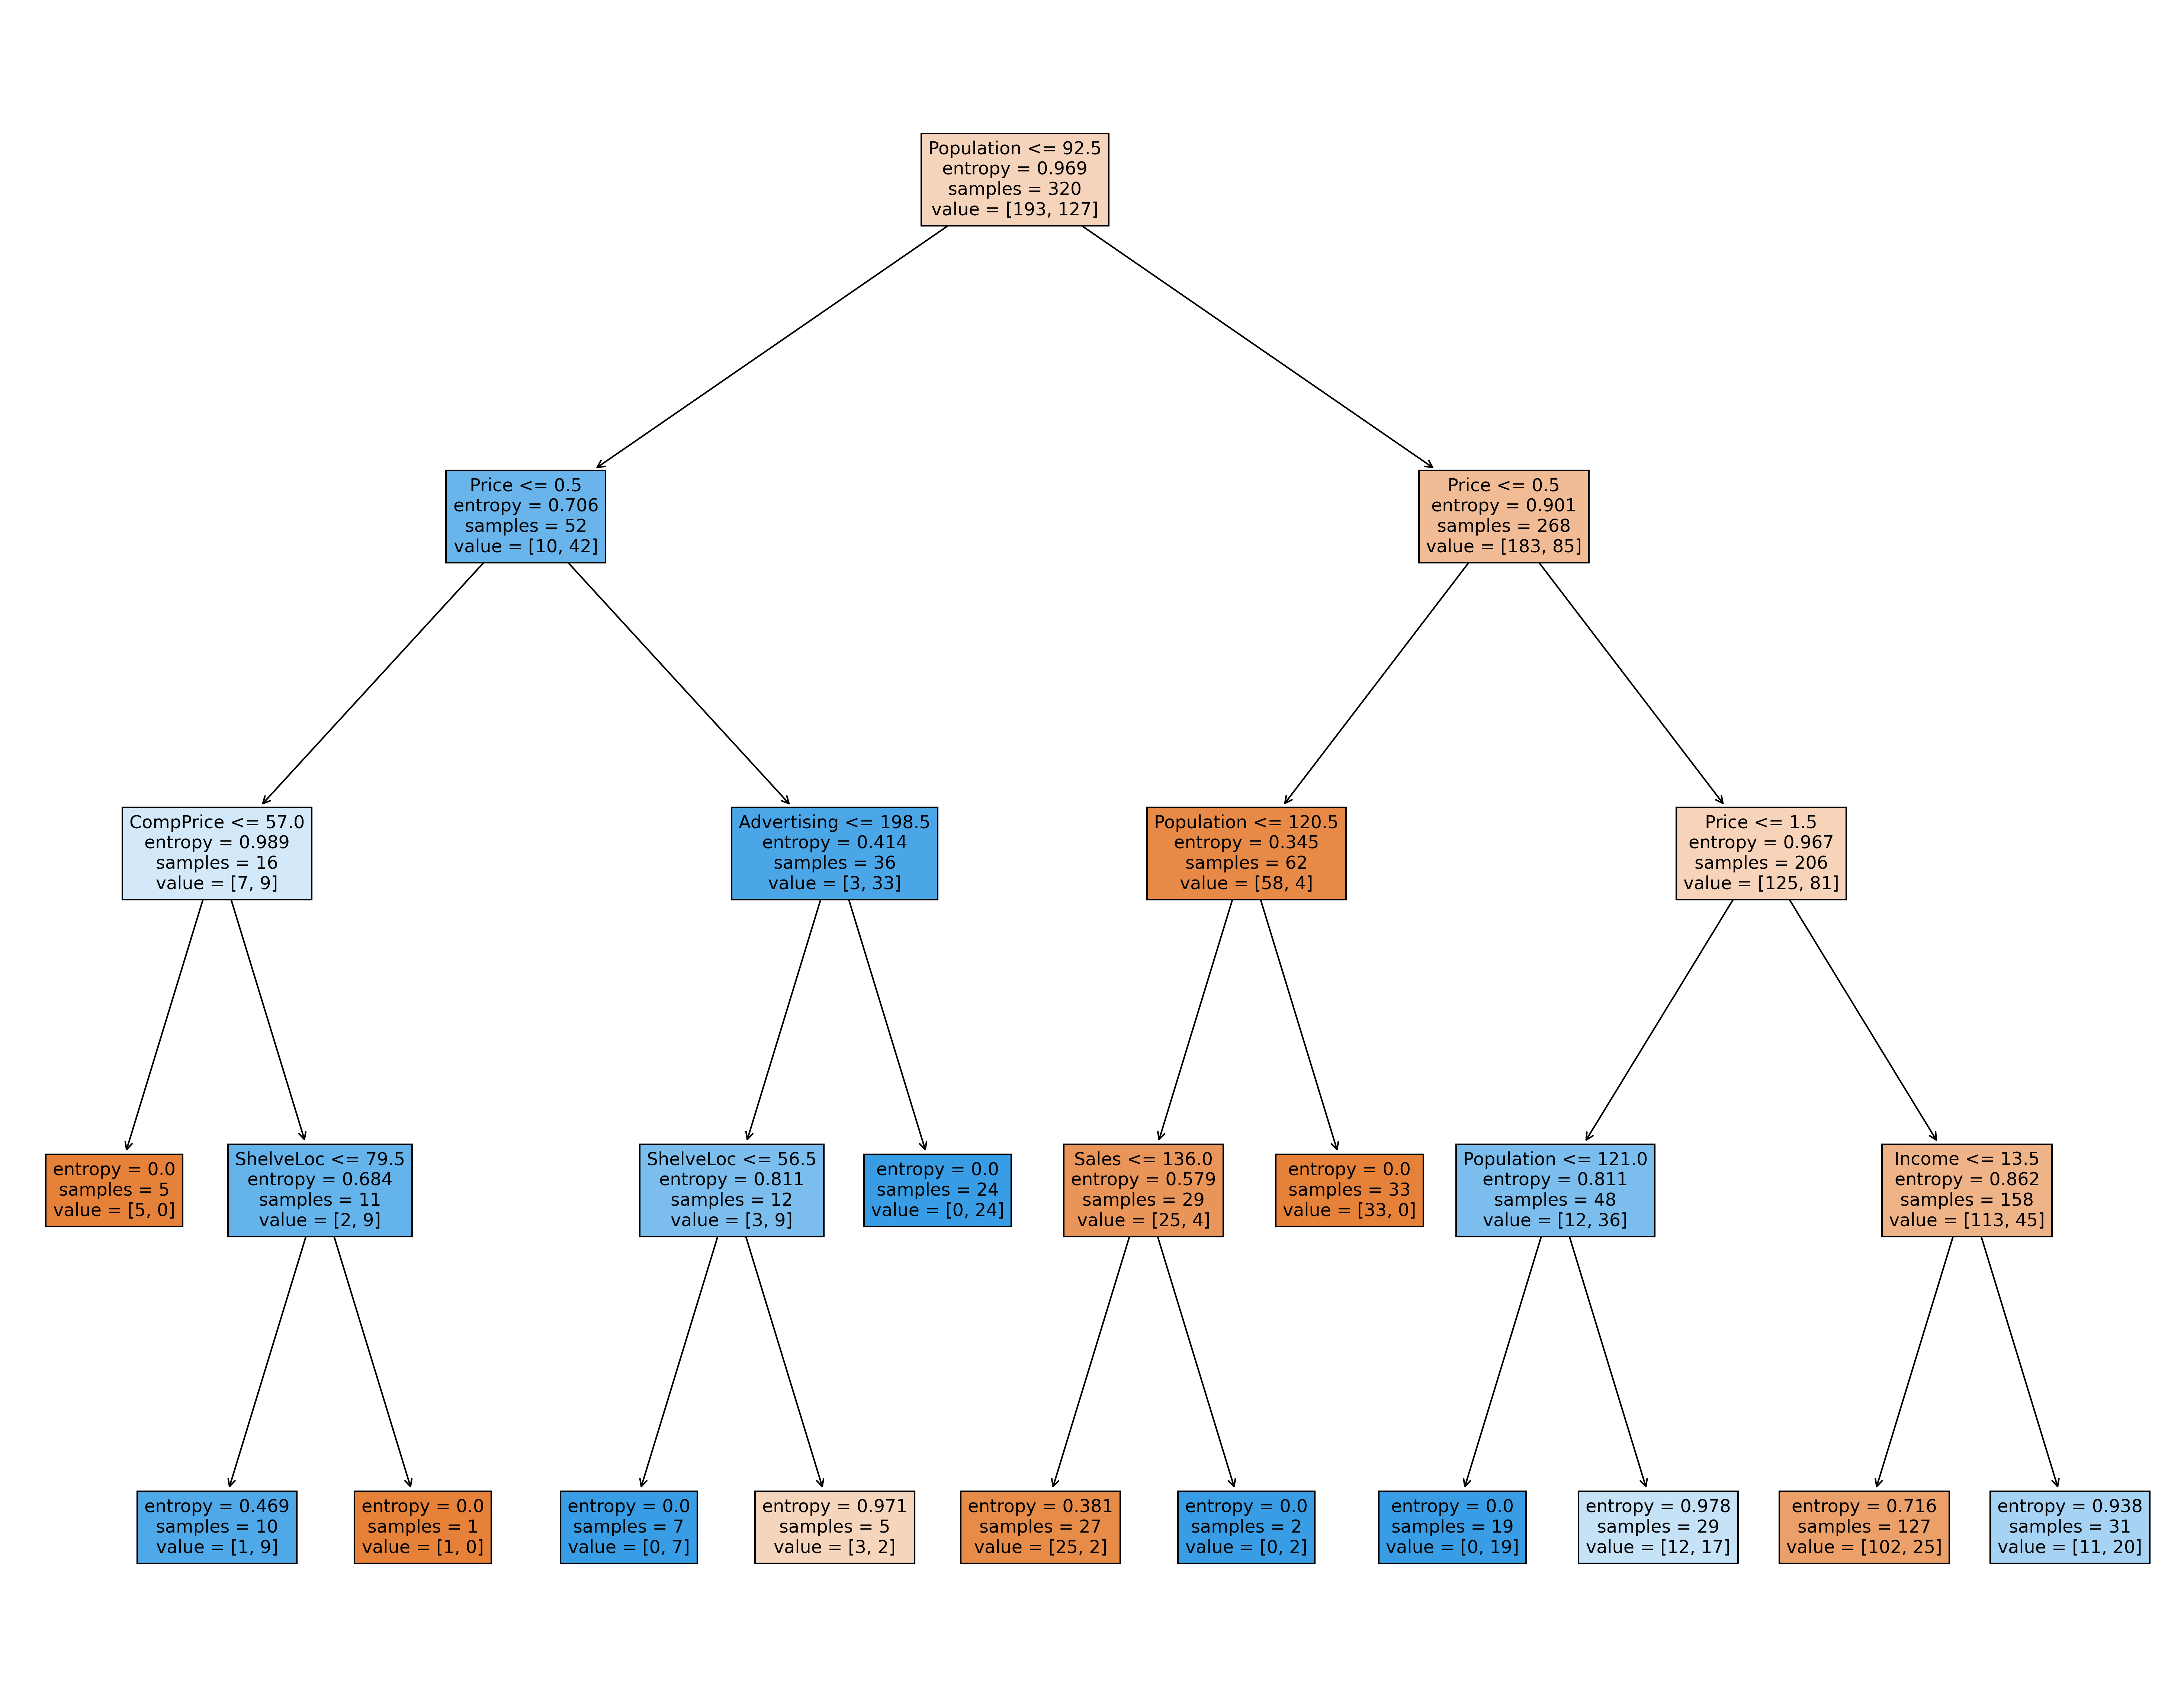

In [40]:
fn = ['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'High']
fig, axes = plt.subplots(nrows = 1, ncols= 1, figsize=(25,20),dpi=300)
tree.plot_tree(model,feature_names=fn,filled=True);

In [43]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    48
1    32
dtype: int64

In [44]:
preds

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [45]:
pd.crosstab(y_test, preds)

col_0,0,1
High,,
0,33,10
1,15,22


In [46]:
np.mean(preds==y_test)

0.6875